In [1]:
pip install mlxtend



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 

In [3]:
import pandas as pd 

In [4]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [5]:
df=pd.read_excel('Online Retail.xlsx')

In [6]:
pip install openpyxl


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df['Description']=df['Description'].str.strip()

In [8]:
df.dropna(axis=0,subset=['InvoiceNo'],inplace=True)	

In [9]:
df['InvoiceNo']=df['InvoiceNo'].astype('str')

In [10]:
df=df[~df['InvoiceNo'].str.contains('C')]

In [11]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
df['Country'].value_counts()

Country
United Kingdom          487622
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


In [13]:
df.shape

(532621, 8)

In [14]:
mybasket=(df[df['Country']=='Germany'].groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
#we have used unstack to convert the rows into column 

In [15]:
mybasket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#now we will conert the values to 0 or 1,as in association the algo needs input in 1 and 0 
def my_encode_units(x):
    if x<=0:
        return 0
    if x>=0:
        return 1
my_basket_sets=mybasket.applymap(my_encode_units)
my_basket_sets.drop('POSTAGE',inplace=True,axis=1)

/var/folders/5r/tv7gl0f17d348qp_tqfqhy0r0000gn/T/ipykernel_5782/3915438500.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  my_basket_sets=mybasket.applymap(my_encode_units)


In [17]:
my_frequent_itemsets = apriori(my_basket_sets,min_support=0.07,use_colnames=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [18]:
my_rules = association_rules(my_frequent_itemsets,metric='lift',min_threshold=1)

In [19]:
my_rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.245077,0.137856,0.074398,0.303571,2.202098,0.040613,1.237951,0.723103
1,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.137856,0.245077,0.074398,0.539683,2.202098,0.040613,1.640006,0.633174
2,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509,0.935072
3,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540,0.837922
4,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.245077,0.102845,0.070022,0.285714,2.778116,0.044817,1.256018,0.847826
5,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.102845,0.245077,0.070022,0.680851,2.778116,0.044817,2.365427,0.713415


In [20]:
my_basket_sets['SPACEBOY LUNCH BOX'].sum()

47

In [21]:
my_basket_sets['ROUND SNACK BOXES SET OF4 WOODLAND'].sum()

112

In [22]:
my_rules[(my_rules['lift'] >=2)&(my_rules['confidence']>=0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.52954,0.837922


In [23]:
from mlxtend.frequent_patterns import fpgrowth

In [31]:
res=fpgrowth(my_basket_sets,min_support=0.05,use_colnames=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [32]:
res

,support,itemsets
0,0.100656,(JUMBO BAG WOODLAND ANIMALS)
1,0.102845,(6 RIBBONS RUSTIC CHARM)
2,0.091904,(JAM MAKING SET PRINTED)
3,0.085339,(PACK OF 72 RETROSPOT CAKE CASES)
4,0.063457,(JAM JAR WITH PINK LID)
5,0.078775,(JUMBO BAG RED RETROSPOT)
6,0.067834,(WOODLAND PARTY BAG + STICKER SET)
7,0.056893,(IVORY KITCHEN SCALES)
8,0.054705,(MEMO BOARD COTTAGE DESIGN)
9,0.245077,(ROUND SNACK BOXES SET OF4 WOODLAND)


In [26]:
import time
l=[0.01,0.02,0.03,0.04,0.05]
t=[]
for i in l:
    t1=time.time()
    apriori(my_basket_sets,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Library/Frameworks/Python.f

In [27]:
l=[0.01,0.02,0.03,0.04,0.05]
f=[]
for i in l:
    t1=time.time()
    fpgrowth(my_basket_sets,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Library/Frameworks/Python.f

In [28]:
import seaborn as sns

NameError: name 'plt' is not defined

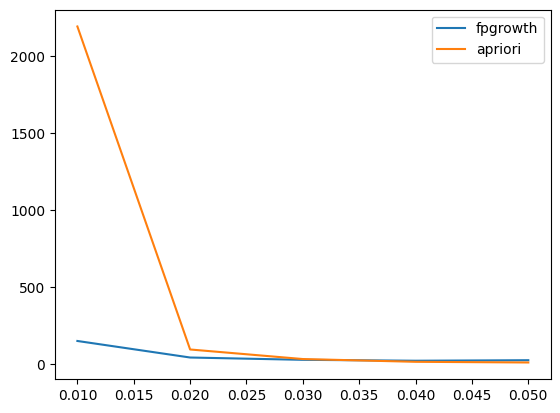

In [29]:
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
